#### 0.0 Simulate phone dataset 
##### a) Use numpy.random.normal() to simulate a dataset with the following requirements:
###### Detta simulerar 400 x-värden från en normalfördelning med medelvärdet 100 och standardavvikelsen 100. Därefter tas absolutvärdet av dessa x-värden. Sedan simuleras 400 brusvärden från en normalfördelning med medelvärdet 0 och standardavvikelsen 50. Slutligen beräknas y-värdena enligt formeln y = 2x + 25 + brus. Datamängden plottas sedan med x-värdena på x-axeln och y-värdena på y-axeln.

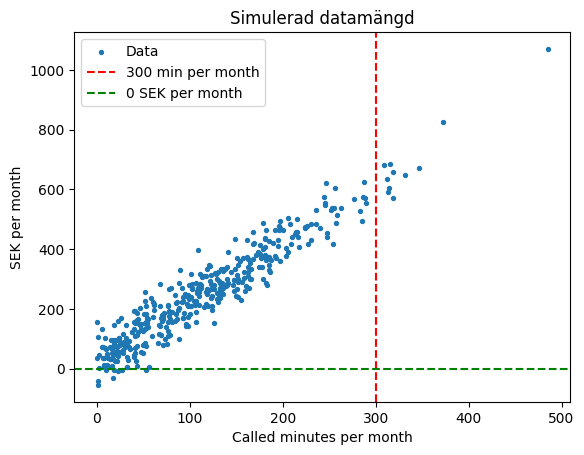

In [18]:
import numpy as np
import matplotlib.pyplot as plt

#sätt seed för reproducerbarhet
np.random.seed(42)

# simulerar 400 x-värden från en normalfördelning med mededlvärdet 100 och standardavvikelsen 100
x = np.random.normal(loc=100, scale=100, size=400)

# Ta absolutvärdet av x-värdena
x_abs = np.abs(x)

# Simulerar 400 brusvärden från en normalfördelning med medelvärdet 0 och standardavvikelsen 50
noise = np.random.normal(loc=0, scale=50, size=400)

# Låt y = 2x + 25 + brus(€)
y = 2 * x_abs + 25 + noise

# Plottar datamängden
plt.scatter(x_abs, y, s=8, label="Data")
plt.axvline(x=300, color='red', linestyle='--', label="300 min per month")
plt.axhline(y=0, color='green', linestyle='--', label="0 SEK per month")
plt.xlabel("Called minutes per month")
plt.ylabel("SEK per month")
plt.title("Simulerad datamängd")
plt.legend()
plt.show()


##### 0.0 b) Now we want to remove some outliers according to this assumption: